# data from: https://wtafiles.wtatennis.com/pdf/rankings/All_Career_Prize_Money.pdf

In [1]:
from platform import python_version
print(python_version())

# data_source = '../Data/All_Career_Prize_Money.pdf'
data_source = 'https://wtafiles.wtatennis.com/pdf/rankings/All_Career_Prize_Money.pdf'

3.7.10


In [2]:
from tika import parser # pip install tika

%time raw = parser.from_file(data_source)
print(raw['content'])

2022-11-20 19:44:04,146 [MainThread  ] [INFO ]  Retrieving https://wtafiles.wtatennis.com/pdf/rankings/All_Career_Prize_Money.pdf to C:\Users\buyer\AppData\Local\Temp/pdf-rankings-all_career_prize_money.pdf.


Wall time: 1.01 s


























Printed: 20 November 2022 Page 1 Please credit WTA Media Information Team

Career Prize Money Leaders
As of: 21 November 2022

Standing Name Nat Career Total
1 WILLIAMS, SERENA USA 94,816,730

2 WILLIAMS, VENUS USA 42,403,103

3 HALEP, SIMONA ROU 40,203,437

4 SHARAPOVA, MARIA 38,777,962

5 WOZNIACKI, CAROLINE DEN 35,233,415

6 AZARENKA, VICTORIA 34,900,323

7 KVITOVA, PETRA CZE 34,763,651

8 KERBER, ANGELIQUE GER 31,886,468

9 RADWANSKA, AGNIESZKA POL 27,683,807

10 KUZNETSOVA, SVETLANA 25,816,890

11 HINGIS, MARTINA SUI 24,749,074

12 MUGURUZA, GARBIÑE ESP 24,722,141

13 CLIJSTERS, KIM BEL 24,545,194

14 PLISKOVA, KAROLINA CZE 24,294,595

15 BARTY, ASHLEIGH AUS 23,829,070

16 DAVENPORT, LINDSAY USA 22,166,338

17 GRAF, STEFFI GER 21,895,277

18 NAVRATILOVA, MARTINA USA 21,626,089

19 SVITOLINA, ELINA UKR 21,418,949

20 OSAKA, NAOMI JPN 21,177,252

21 HENIN, JUSTINE BEL 20,863,335

22 STOSUR, SAMANTHA AUS 20,051,140

23 JANKOVIC, JELENA SRB 

In [3]:
#print(raw.keys())
#print(raw['metadata'])
#print(raw['status'])
text = raw['content'].split('\n')
#print('\n'.join(text))

In [4]:
import re
# this statement selects only lines of text which contain player's earning data
result = [line for line in text if re.search(r'^\d+ [^0-9]+ [0-9,$]+', line)] 
print(len(result))
print('\n'.join(result))

10774
1 WILLIAMS, SERENA USA 94,816,730
2 WILLIAMS, VENUS USA 42,403,103
3 HALEP, SIMONA ROU 40,203,437
4 SHARAPOVA, MARIA 38,777,962
5 WOZNIACKI, CAROLINE DEN 35,233,415
6 AZARENKA, VICTORIA 34,900,323
7 KVITOVA, PETRA CZE 34,763,651
8 KERBER, ANGELIQUE GER 31,886,468
9 RADWANSKA, AGNIESZKA POL 27,683,807
10 KUZNETSOVA, SVETLANA 25,816,890
11 HINGIS, MARTINA SUI 24,749,074
12 MUGURUZA, GARBIÑE ESP 24,722,141
13 CLIJSTERS, KIM BEL 24,545,194
14 PLISKOVA, KAROLINA CZE 24,294,595
15 BARTY, ASHLEIGH AUS 23,829,070
16 DAVENPORT, LINDSAY USA 22,166,338
17 GRAF, STEFFI GER 21,895,277
18 NAVRATILOVA, MARTINA USA 21,626,089
19 SVITOLINA, ELINA UKR 21,418,949
20 OSAKA, NAOMI JPN 21,177,252
21 HENIN, JUSTINE BEL 20,863,335
22 STOSUR, SAMANTHA AUS 20,051,140
23 JANKOVIC, JELENA SRB 19,089,259
24 STEPHENS, SLOANE USA 17,223,760
25 SANCHEZ-VICARIO, ARANTXA ESP 16,942,639
26 LI, NA CHN 16,709,074
27 ZVONAREVA, VERA 15,567,264
28 IVANOVIC, ANA SRB 15,510,787
29 GARCIA, CAROLINE FRA 15,064,141
30 MAUR

In [5]:
player_earnings = []
player_names = []
last_name = None
first_name = None
country = None

for line in result:
    # parse player data into groups: 1-(Rank), 2-(Last Name, First Name, Country) and 3-(Earnings)
    player_info = re.search(r'(^\d+) ([^0-9]+) ([0-9,]+)$', line)
    # split group(2) into individual fields
    name_country = re.search(r'(^[\w\s\.\'\(\)-]+), ([\w\.\(\) -]+) ([A-Z]{3}?$)', player_info.group(2), re.UNICODE)
    if name_country:
        last_name, first_name, country = name_country.groups()
    else:
        name_country = re.search(r'(^[\w\s\'\(\)-]+), ([\w\.\(\) -]+)', player_info.group(2), re.UNICODE)
        if name_country:
            last_name, first_name= name_country.groups()
            country = None
        else:
            print(player_info.group(2))
    player_earnings.append([player_info.group(1), last_name, first_name, country, player_info.group(3)])

In [6]:
import numpy as np

@np.vectorize
def create_wiki_link(first_name, last_name):
    return 'https://en.wikipedia.org/wiki/' + first_name.title() +'_' + last_name.title()

import pandas as pd
df = pd.DataFrame(player_earnings, columns=['Rank', 'LastName', 'FirstName', 'Country', 'Earnings'])
df['Earnings'] = df['Earnings'].str.replace(',', '').astype(float)
df['WikiLink'] = create_wiki_link(df['FirstName'], df['LastName'])
#df.to_excel('earnings.xlsx', index=False)
df.to_html('earnings.html', render_links=True, index=False)
df.head(50)

,Rank,LastName,FirstName,Country,Earnings,WikiLink
0,1,WILLIAMS,SERENA,USA,94816730.0,https://en.wikipedia.org/wiki/Serena_Williams
1,2,WILLIAMS,VENUS,USA,42403103.0,https://en.wikipedia.org/wiki/Venus_Williams
2,3,HALEP,SIMONA,ROU,40203437.0,https://en.wikipedia.org/wiki/Simona_Halep
3,4,SHARAPOVA,MARIA,None,38777962.0,https://en.wikipedia.org/wiki/Maria_Sharapova
4,5,WOZNIACKI,CAROLINE,DEN,35233415.0,https://en.wikipedia.org/wiki/Caroline_Wozniacki
5,6,AZARENKA,VICTORIA,None,34900323.0,https://en.wikipedia.org/wiki/Victoria_Azarenka
6,7,KVITOVA,PETRA,CZE,34763651.0,https://en.wikipedia.org/wiki/Petra_Kvitova
7,8,KERBER,ANGELIQUE,GER,31886468.0,https://en.wikipedia.org/wiki/Angelique_Kerber
8,9,RADWANSKA,AGNIESZKA,POL,27683807.0,https://en.wikipedia.org/wiki/Agnieszka_Radwanska
9,10,KUZNETSOVA,SVETLANA,None,25816890.0,https://en.wikipedia.org/wiki/Svetlana_Kuznetsova


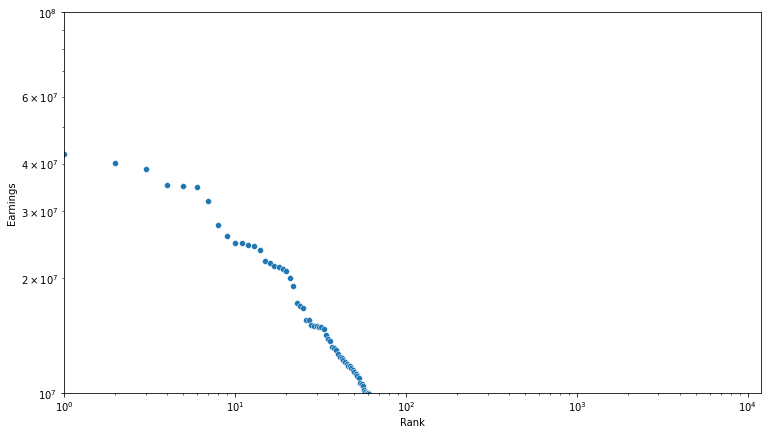

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize

figsize(12.5, 7)
scatter, ax = plt.subplots()
ax = sns.scatterplot(x='Rank', y='Earnings', data=df.head(1000))
#ax = sns.scatterplot(x='Rank', y='Earnings', data=df)
ax.set(xscale='log', yscale='log')
# I hate doing this: the plotting routines should pick up better ranges, but for now, I don't 
# have a better solution to get reasonable charts.
ax.set_xlim([1, 12000])
ax.set_ylim([10000000, 100000000])
plt.show()
# P.S. This chart sucks - needs a lot of tweaking to make it useful in general

In [8]:
df = df.replace({None:'---'})

In [9]:
df_sum = df.groupby('Country')['Earnings'].sum()
top_N = df_sum.sort_values(ascending=False).head(25)
df_top = df[df['Country'].isin(top_N.index)]

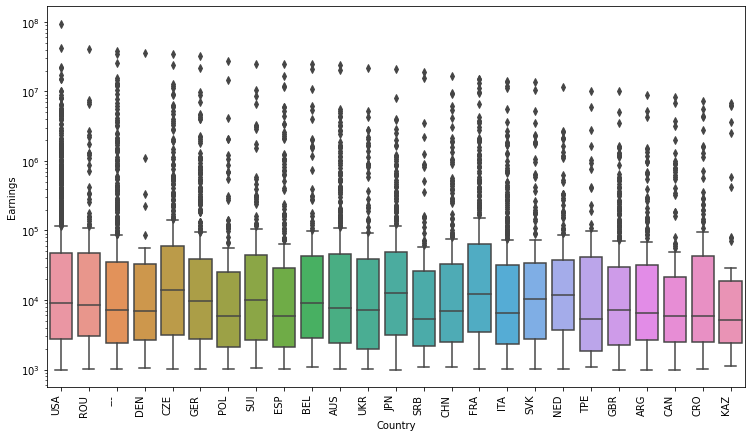

In [10]:
box, ax = plt.subplots()
ax = sns.boxplot(data=df_top, x='Country', y='Earnings')
ax.set(yscale='log')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

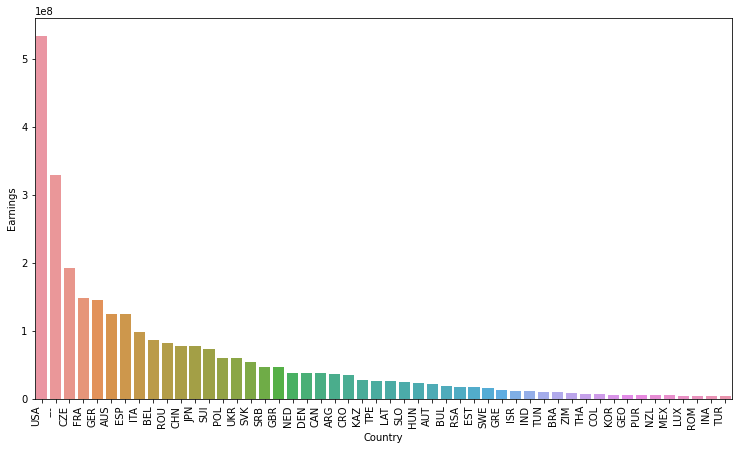

In [11]:
df_sum = df_sum.to_frame()
df_sum = df_sum.sort_values(by='Earnings', ascending=False).head(50)
box, ax = plt.subplots()
ax = sns.barplot(data=df_sum, y='Earnings', x=df_sum.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

In [12]:
df_sum

,Earnings
Country,
USA,533475254.0
---,328515695.0
CZE,192452944.0
FRA,148594114.0
GER,145071649.0
AUS,124404966.0
ESP,124388012.0
ITA,97953182.0
BEL,86651465.0
